In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
#explore both data bases
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
engine.execute('Select * from measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
engine.execute('Select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results. 
* Starting from the most recent data point in the database. 

* Calculate the date one year from the last date in data set.

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

* Sort the dataframe by date

* Use Pandas Plotting with Matplotlib to plot the data



In [14]:
# Find the most recent date in the data set.

recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [15]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= year_ago).all()

precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
df.set_index('date', inplace=True)



In [18]:
#sort by date
df.sort_values(['date'])
df.head(2330)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


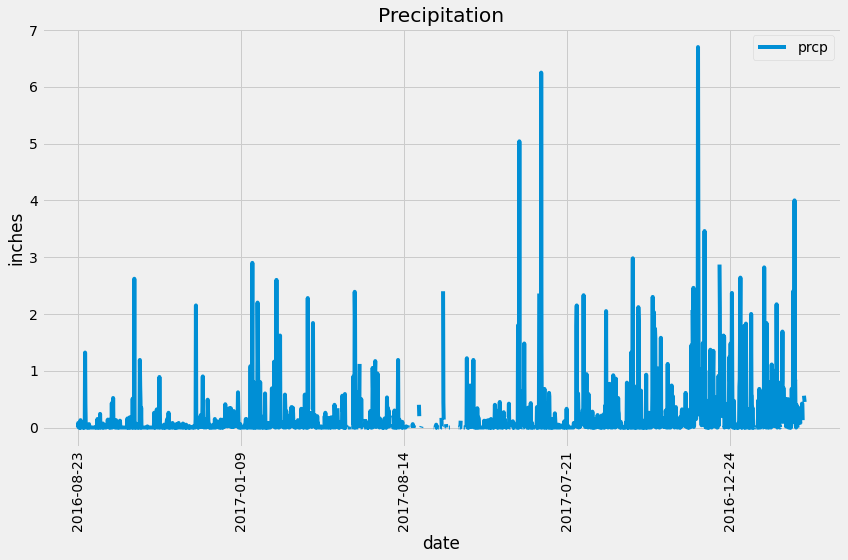

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = df.plot(rot = 90, figsize=(12,8))
ax.set_title('Precipitation')
ax.set_ylabel('inches')
plt.tight_layout()
plt.savefig('../Instructions/precipitation.png')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(measurement).group_by(measurement.station).count()
station_count

9

* Design a query to find the most active stations (i.e. what stations have the most rows?)

* List the stations and the counts in descending order.

In [22]:
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# need to determine the most active station from station_id for the calculation below

active_station = session.query(measurement.station).group_by(measurement.station). order_by\
    (func.count(measurement.date).desc()).first()

active_station[0]

'USC00519281'

* Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



In [24]:
lowest_temp = session.query(measurement.station, func.min(measurement.tobs)).\
    filter(measurement.station==active_station[0]).all()
print(f'The lowest temperature recorded at station ID {active_station[0]} was {lowest_temp[0]} degrees.')

The lowest temperature recorded at station ID USC00519281 was ('USC00519281', 54.0) degrees.


In [25]:
highest_temp = session.query(measurement.station, func.max(measurement.tobs)).\
    filter(measurement.station==active_station[0]).all()
print(f'The highest temperature recorded at station ID {active_station[0]} was {highest_temp[0]} degrees.')

The highest temperature recorded at station ID USC00519281 was ('USC00519281', 85.0) degrees.


In [26]:
avg_temp = session.query(measurement.station, func.avg(measurement.tobs)).\
    filter(measurement.station==active_station[0]).all()
print(f'The average temperature recorded at station ID {active_station[0]} was {avg_temp[0]} degrees.')

The average temperature recorded at station ID USC00519281 was ('USC00519281', 71.66378066378067) degrees.


 * Using the most active station id
    
 * Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [27]:
observation = session.query(measurement.tobs).filter(measurement.station==active_station[0]).\
    filter(measurement.date > '2016-08-23').all()

observation_df = pd.DataFrame(observation)
observation_df.head()

,0
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


In [28]:
observation_df.tail()

,0
346,77.0
347,77.0
348,76.0
349,76.0
350,79.0


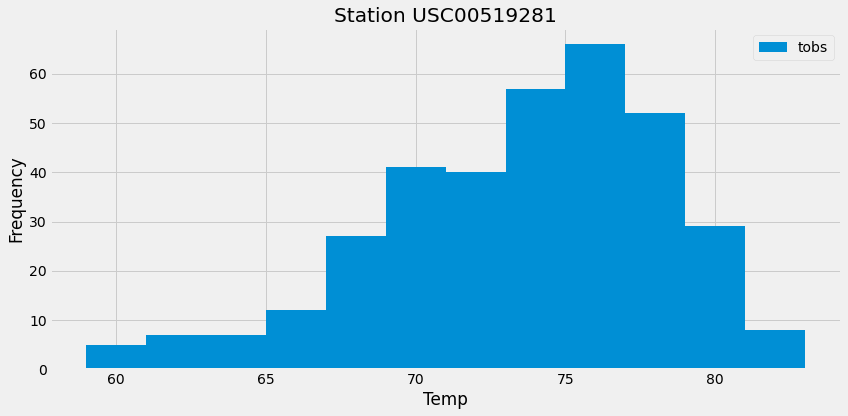

In [29]:
tobs = observation_df 
tobs.plot.hist(bins=12, figsize=(12,6))
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Station ' + active_station[0])
plt.legend(['tobs'])
plt.tight_layout()
plt.savefig('../Instructions/frequency.png')
plt.show()

# Close session

In [30]:
# Close Session
session.close()